# Review Scale

In [112]:
import pickle
import os 
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import log_loss, accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

with open(os.path.join("data","case_8_final_feats.pkl"),"rb") as f:
    y, case_8_reduced_feats = pickle.load(f)
    
columns = case_8_reduced_feats.columns
#Assume values with _ is an object
columns = [ col for col in columns if "_" not in col ]

In [2]:
case_8_reduced_feats[columns].describe()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v119,v120,v122,v123,v124,v126,v127,v129,v130,v131
count,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,...,1.143210e+05,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05
mean,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,...,3.168970e+00,1.291218e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,0.310144,1.925763e+00,1.739389e+00
std,8.132649e-01,2.225036e+00,8.626621e-01,1.543441e+00,4.506138e-01,4.427150e-01,2.109786e+00,1.449542e+00,1.393466e+00,5.933834e-01,...,3.163604e+00,5.545506e-01,1.348700e+00,1.943431,1.591555e+00,3.779128e-01,1.221225e+00,0.693262,9.496402e-01,8.518204e-01
min,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,-9.875317e-07,-1.459062e-07,...,-9.998183e-07,-9.932534e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,1.346153e+00,6.575770e+00,4.068697e+00,8.394090e+00,2.340968e+00,2.376586e+00,2.653147e-01,8.813560e+00,1.050328e+00,1.539823e+01,...,1.169425e+00,1.052632e+00,6.519607e+00,2.571053,8.471320e-02,1.570974e+00,2.762497e+00,0.000000,1.449477e+00,1.463414e+00
50%,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.312910e+00,1.544741e+01,...,3.168970e+00,1.291218e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,0.000000,1.925763e+00,1.739389e+00
75%,1.630686e+00,7.551501e+00,4.340229e+00,8.924798e+00,2.484699e+00,2.528445e+00,1.496569e+00,9.302325e+00,2.100657e+00,1.559390e+01,...,3.168970e+00,1.291218e+00,6.999999e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,0.000000,1.925763e+00,1.739389e+00
max,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,1.853392e+01,2.000000e+01,...,2.000000e+01,1.039427e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


# Run XgBoost

In [4]:

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    case_8_reduced_feats.values, y, 
    test_size=0.3,
    random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(80024, 438) (34297, 438)
(80024,) (34297,)


In [5]:
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test, y_test)

In [95]:
result = []
stopping = 10
best_params = None
if __name__ == "__main__":
    gamma =  list(np.arange(20, 10, -2))
    max_depth = list(np.arange(2, 12, 3))
    eta = list(np.arange(0.01, 1, 0.4))
    min_child_weight = list(np.arange(0.01, 1, 0.4))
    objective="binary:logistic"

    parameters = []
    for gamma in gamma:
        for depth in max_depth:
            for e in eta:
                for min_child in min_child_weight:
                    parameters.append({
                    "gamma": gamma, "max_depth": depth, "eta": e,"min_child_weight":min_child,
               "objective" : "binary:logistic"})
    
    print("Total parameter values to train", len(parameters))
    for param in tqdm(parameters):
        model = xgb.cv(param,xgtrain,num_boost_round=50,nfold=5,metrics=(["logloss",'auc']),
                   stratified=True,seed=123,early_stopping_rounds=stopping)
        mean_logloss = model['test-logloss-mean'].min()
        boost_rounds = model['test-logloss-mean'].argmin()
        mean_auc =  model['test-auc-mean'].max()
        auc_boost_round = model['test-auc-mean'].argmax()
            
        result.append({'gamma':param["gamma"],
                       'max_depth':param["max_depth"],
                       "eta": param["eta"],
                       "min_child_weight":param["min_child_weight"],
                       "auc":mean_auc,"logloss":mean_logloss})
        
            
    print("Done!")



  0%|                                                                                          | 0/180 [00:00<?, ?it/s]

Total parameter values to train 180



 37%|███████████████████████████▍                                               | 66/180 [3:44:31<11:34:27, 365.50s/it]


 73%|██████████████████████████████████████████████████████▉                    | 132/180 [6:58:54<2:54:42, 218.38s/it]


100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [9:36:03<00:00, 192.02s/it]

Done!


In [96]:
pd.DataFrame(result).to_csv("XGBOOST_Tunning.csv")

In [109]:
result

[{'gamma': 20,
  'max_depth': 2,
  'eta': 0.01,
  'min_child_weight': 0.01,
  'auc': 0.7038222,
  'logloss': 0.5844590000000001},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.01,
  'min_child_weight': 0.41000000000000003,
  'auc': 0.7038222,
  'logloss': 0.5844590000000001},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.01,
  'min_child_weight': 0.81,
  'auc': 0.7038222,
  'logloss': 0.5844590000000001},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.41000000000000003,
  'min_child_weight': 0.01,
  'auc': 0.7401949999999999,
  'logloss': 0.47718340000000004},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.41000000000000003,
  'min_child_weight': 0.41000000000000003,
  'auc': 0.7401949999999999,
  'logloss': 0.47718340000000004},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.41000000000000003,
  'min_child_weight': 0.81,
  'auc': 0.7401949999999999,
  'logloss': 0.47718340000000004},
 {'gamma': 20,
  'max_depth': 2,
  'eta': 0.81,
  'min_child_weight': 0.01,
  'auc': 0.7394704,
  'logloss': 0.4778

In [99]:
pd.DataFrame(result).sort_values(by=['logloss'],ascending=True)

,gamma,max_depth,eta,min_child_weight,auc,logloss
95,16,8,0.41,0.81,0.749039,0.471422
158,12,5,0.41,0.81,0.748748,0.471458
157,12,5,0.41,0.41,0.748778,0.471465
156,12,5,0.41,0.01,0.748778,0.471465
59,18,8,0.41,0.81,0.748880,0.471480
...,...,...,...,...,...,...
144,12,2,0.01,0.01,0.703822,0.584459
145,12,2,0.01,0.41,0.703822,0.584459
36,18,2,0.01,0.01,0.703822,0.584459
38,18,2,0.01,0.81,0.703822,0.584459


In [207]:
def heatmapplot(result,param1,param2):
     

    min_scores = pd.DataFrame(result).groupby([param1, 
                                    param2]).min()
    min_scores = min_scores.unstack()[['logloss']]
    sns.heatmap(min_scores.logloss, annot=True, fmt='.4g')
    
    plt.title('Logloss score for {} vs {}'.format(param1,param2), fontsize = 15) # title with fontsize 20
    plt.show()

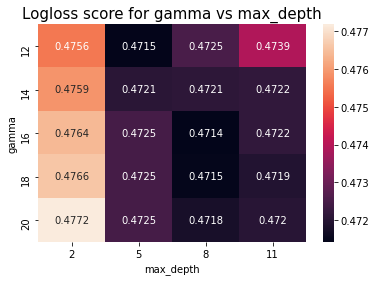

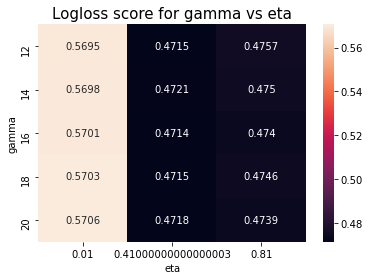

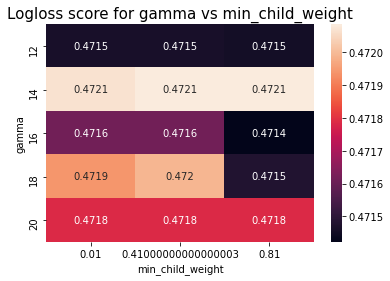

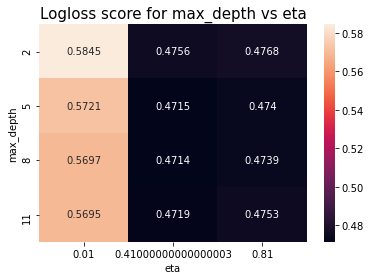

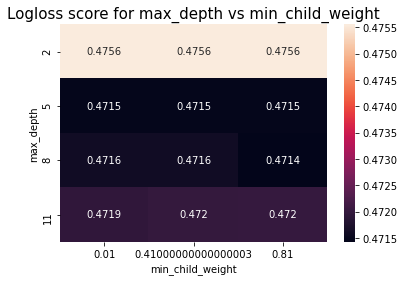

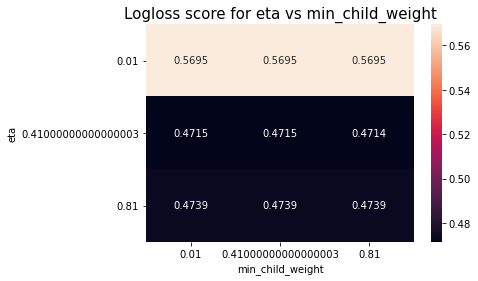

In [208]:

heatmapplot(result,'gamma','max_depth')
heatmapplot(result,'gamma','eta')
heatmapplot(result,'gamma','min_child_weight')
heatmapplot(result,'max_depth','eta')
heatmapplot(result,'max_depth','min_child_weight')
heatmapplot(result,'eta','min_child_weight')


In [209]:
xgboost_params = { 
   "objective": "binary:logistic",
   "booster": "gbtree",
   "eval_metric": "logloss",
   "eta": 0.41, 
   "gamma":16,
   "min_child_weight": 0.81,
   "max_depth": 8
}
boost_round = 50
clf = xgb.train(xgboost_params,xgtrain,num_boost_round=boost_round,verbose_eval=True,maximize=False)

In [210]:
test_preds = clf.predict(xgtest, ntree_limit=clf.best_iteration)

In [211]:

print(log_loss(y_test,test_preds))
print(accuracy_score(y_test,np.rint(test_preds)))

0.46962138502800604
0.7811470390996297


In [214]:
clf.best_iteration

49